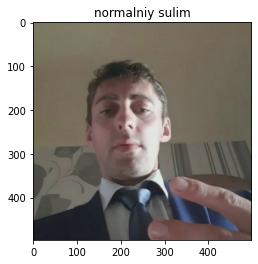

In [ ]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('sulim.jpg')

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
plt.title('normalniy sulim')
plt.show()

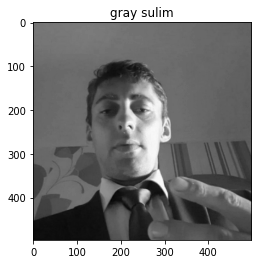

In [ ]:
gray = cv2.imread('sulim.jpg', 0)

plt.imshow(gray,'gray')
plt.title('gray sulim')
plt.show()

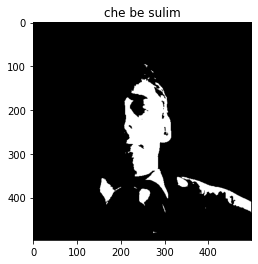

In [ ]:
ret,thresh1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)

plt.imshow(thresh1,'gray')
plt.title('che be sulim')
plt.show()

In [7]:
thresh2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
plt.imshow(thresh2,'gray')
plt.title('che be sulim')
plt.show()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1674: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::adaptiveThreshold'


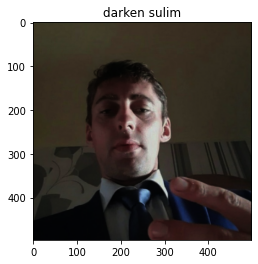

In [53]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

darken = adjust_gamma(rgb_img, gamma=0.5)

plt.imshow(darken,'gray')
plt.title('darken sulim')
plt.show()

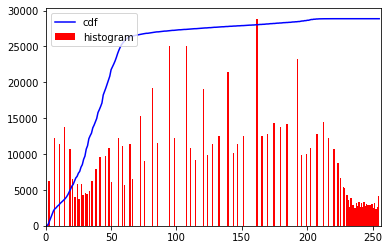

In [64]:
hist,bins = np.histogram(darken.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(lighten.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [65]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
lighten = cdf[darken]

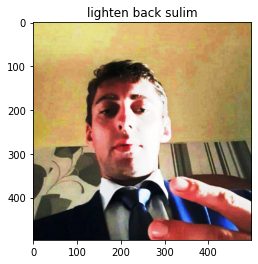

In [66]:
plt.imshow(lighten,'gray')
plt.title('lighten back sulim')
plt.show()

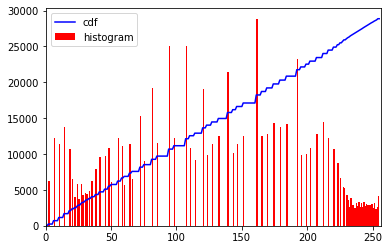

In [67]:
hist,bins = np.histogram(lighten.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(lighten.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

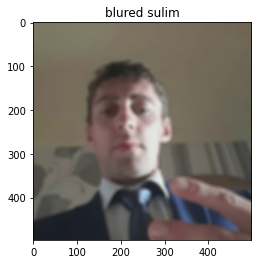

In [68]:
blur = cv2.blur(rgb_img, (10,10))
plt.imshow(blur,'gray')
plt.title('blured sulim')
plt.show()

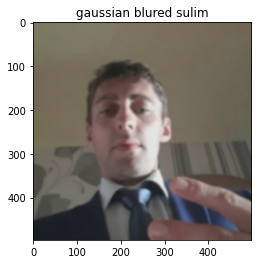

In [81]:
blur = cv2.GaussianBlur(rgb_img, (11,11), 0)
plt.imshow(blur,'gray')
plt.title('gaussian blured sulim')
plt.show()

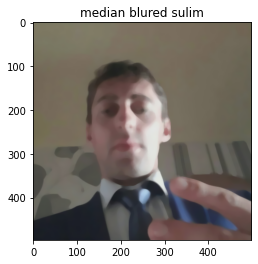

In [82]:
blur = cv2.medianBlur(rgb_img, 11)
plt.imshow(blur,'gray')
plt.title('median blured sulim')
plt.show()

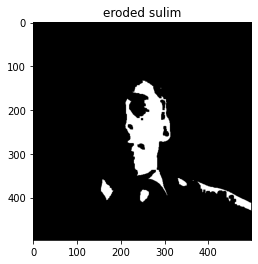

In [92]:
kernel = np.ones((5, 5), 'uint8')

erode_img = cv2.erode(thresh1, kernel, iterations=1)

plt.imshow(erode_img,'gray')
plt.title('eroded sulim')
plt.show()

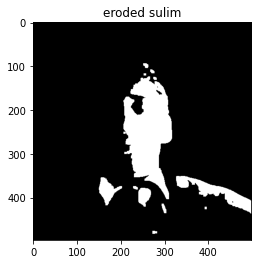

In [93]:
kernel = np.ones((5, 5), 'uint8')

dilate_img = cv2.dilate(thresh1, kernel, iterations=1)

plt.imshow(dilate_img,'gray')
plt.title('eroded sulim')
plt.show()